In [54]:
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import tumour_model as tm
import scheduler as sch
import file_manipulation as fm

In [72]:
S = [0.1, 0.2, 0.3, 0.4]

In [66]:
assert len(sch.plan_to_schedule(*S, 1, 1)) == 18
assert len(sch.plan_to_schedule(*S, 4, 5)) == 1

In [74]:
test_cycles_1= np.array([
    ["d1", 0.5, 1, 2],
    ["d1", 0.3, 5, 9],
    ["d2", 0.9, 2, 20],
    ["d2", 0.9, 10, 20],
    ["d3", 0.8, 30, 40],
    ["d4", 0.8, 70, 80],
    ], dtype=object)

test_cycles_2 = np.array([
    ["d1", 0.0, 0, 2],
    ["d1", 0.0, 5, 9],
    ["d1", 0.0, 10, 15],
    ["d1", 1.0, 20, 30],
    ["d2", 0.0, 2, 20],
    ["d2", 0.75, 100, 120],
    ["d3", 0.0, 30, 40],
    ["d4", 0.0, 70, 80],
    ], dtype=object)

31745.851089208812


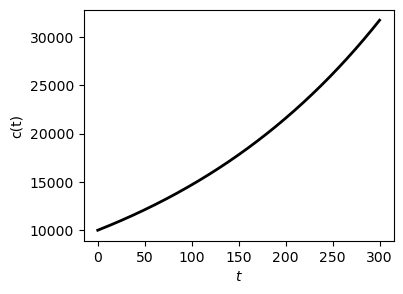

In [75]:
a = 1
sol = tm.tumour_growth(10000, 300, test_cycles_2, a, S, TD=180.)
tm.plot_solution(sol)
print(tm.final_tumour_volume(sol))

31745.851089208812


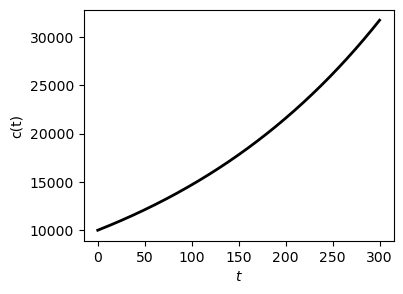

In [60]:
gen_cycles = np.array(sch.plan_to_schedule(*S, 1, 1), dtype=object)
sol = tm.tumour_growth(10000, 300, gen_cycles, a, S, TD=180.)
tm.plot_solution(sol)
print(tm.final_tumour_volume(sol))

In [61]:
cyc_df = fm.cycles_to_df(test_cycles_1)
plan = fm.cycles_df_to_report(cyc_df)
sch_df = fm.report_to_df(plan)
sch_df

,dose,start,end
drug,,,
d1,0.5,1,2
d1,break,2,5
d1,0.3,5,9
d2,0.9,2,20
d2,0.9,10,20
d3,0.8,30,40
d4,0.8,70,80
